# Online Retail Store Analysis (Capstone Project)

### Problem Statement :

An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

### Dataset Information:

The OnlineRetail.csv contains 541909 rows and 8 columns.

### Project Objective:

* Using the above data, find useful insights about the customer purchasing history
that can be an added advantage for the online retailer.
* Segment the customers based on their purchasing behavior.

### Choosing the Algorithm for the Project: 
    
K Means Clustering

In [1]:
import pandas as pd
import numpy as np

In [2]:
retail=pd.read_csv('OnlineRetail.csv',encoding='latin-1')

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
retail.shape

(541909, 8)

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
retail=retail.dropna()

In [8]:
retail.shape

(406829, 8)

In [9]:
retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
retail.loc[:,'CustomerID']=retail.loc[:,'CustomerID'].astype(str)

In [12]:
retail.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [13]:
retail['Amount']=retail['Quantity']*retail['UnitPrice']

In [14]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [15]:
rfm_m=retail.groupby('CustomerID')['Amount'].sum()

In [16]:
len(retail['CustomerID'].unique())

4372

In [17]:
rfm_m.head()

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
Name: Amount, dtype: float64

In [18]:
m=pd.DataFrame(rfm_m)

In [19]:
m.reset_index(inplace=True)

In [20]:
m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [21]:
rfm_f=retail.groupby('CustomerID')['InvoiceNo'].count()

In [22]:
rfm_f.head()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
Name: InvoiceNo, dtype: int64

In [23]:
retail[retail['CustomerID']=='12347.0']['InvoiceNo'].unique()

array(['537626', '542237', '549222', '556201', '562032', '573511',
       '581180'], dtype=object)

In [24]:
rfm_f=retail.groupby(['CustomerID','InvoiceNo']).size().groupby(level=0).count()

In [25]:
rfm_f.head()

CustomerID
12346.0    2
12347.0    7
12348.0    4
12349.0    1
12350.0    1
dtype: int64

In [26]:
Alt_f=retail.groupby('CustomerID')['InvoiceNo'].nunique()

In [27]:
Alt_f.head()

CustomerID
12346.0    2
12347.0    7
12348.0    4
12349.0    1
12350.0    1
Name: InvoiceNo, dtype: int64

In [28]:
f=pd.DataFrame(Alt_f,)

In [29]:
f.reset_index(inplace=True)

In [30]:
f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [31]:
f.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

In [32]:
f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [33]:
m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [34]:
retail['InvoiceDate']=pd.to_datetime(retail['InvoiceDate'])

In [35]:
retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [36]:
retail['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [37]:
max_date=max(retail['InvoiceDate'])

In [38]:
max_date

Timestamp('2011-12-09 12:50:00')

In [39]:
retail['diff']=max_date-retail['InvoiceDate']

In [40]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [41]:
rfm_r=retail.groupby('CustomerID')['diff'].min()

In [42]:
rfm_r.head()

CustomerID
12346.0   325 days 02:33:00
12347.0     1 days 20:58:00
12348.0    74 days 23:37:00
12349.0    18 days 02:59:00
12350.0   309 days 20:49:00
Name: diff, dtype: timedelta64[ns]

In [43]:
r=pd.DataFrame(rfm_r)
r.reset_index(inplace=True)

In [44]:
r.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [45]:
r['diff']=r['diff'].dt.days

In [46]:
r.head()

,CustomerID,diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [47]:
m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [48]:
f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [49]:
rf1=pd.merge(m,f,on='CustomerID',how='inner')

In [50]:
rf1.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1


In [51]:
final_data=pd.merge(rf1,r,on='CustomerID',how='inner')

In [52]:
final_data.head()

,CustomerID,Amount,Frequency,diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309


In [53]:
final_data.describe()

,Amount,Frequency,diff
count,4372.000000,4372.000000,4372.000000
mean,1898.459701,5.075480,91.047118
std,8219.345141,9.338754,100.765435
min,-4287.630000,1.000000,0.000000
25%,293.362500,1.000000,16.000000
50%,648.075000,3.000000,49.000000
75%,1611.725000,5.000000,142.000000
max,279489.020000,248.000000,373.000000


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
rfm_df=final_data[['Amount','Frequency','diff']]

In [56]:
sky=StandardScaler()

In [57]:
rfm_scaled=sky.fit_transform(rfm_df)

In [58]:
rfm_scaled

array([[-0.23100099, -0.32936215,  2.32202285],
       [ 0.29343167,  0.20610242, -0.89373323],
       [-0.01231622, -0.11517632, -0.1691956 ],
       ...,
       [-0.20951263, -0.22226923, -0.83418219],
       [ 0.02390005,  1.16993863, -0.87388289],
       [-0.00744423, -0.22226923, -0.48680114]])

In [59]:
rfm_scaled=pd.DataFrame(rfm_scaled)

In [60]:
rfm_scaled.columns=['Amount','Frequency','diff']

In [61]:
rfm_scaled.head()

,Amount,Frequency,diff
0,-0.231001,-0.329362,2.322023
1,0.293432,0.206102,-0.893733
2,-0.012316,-0.115176,-0.169196
3,-0.017146,-0.436455,-0.725005
4,-0.190312,-0.436455,2.163220


In [62]:
from sklearn.cluster import KMeans
import seaborn as sns

In [63]:
icd=[]

range_clusters=[2,3,4,5,6,7,8]

for n in range_clusters:
    model=KMeans(n_clusters=n)
    model.fit(rfm_scaled)
    icd.append(model.inertia_)

icd

[9134.68912779429,
 5527.2228077771,
 4046.2849223509506,
 3019.584607593825,
 2370.010656426188,
 1905.967603607249,
 1587.317825751804]

In [64]:
import matplotlib.pyplot as plt

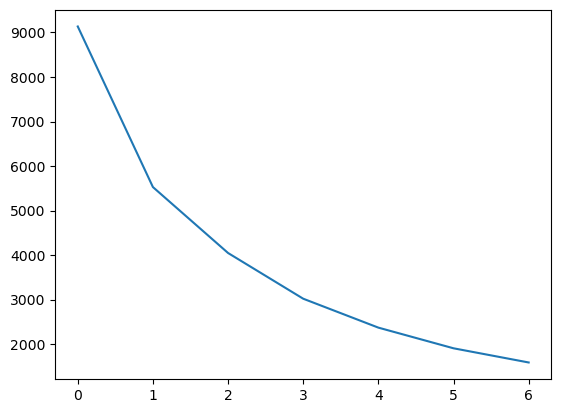

In [65]:
plt.plot(icd)

In [72]:
model2=KMeans(n_clusters=3)
model2.fit(rfm_scaled)

KMeans(n_clusters=3)

In [73]:
model2.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [74]:
final_data['C_id']=model2.labels_

In [75]:
final_data.head()

,CustomerID,Amount,Frequency,diff,C_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,7,1,0
2,12348.0,1797.24,4,74,0
3,12349.0,1757.55,1,18,0
4,12350.0,334.40,1,309,1


<AxesSubplot:xlabel='C_id', ylabel='Amount'>

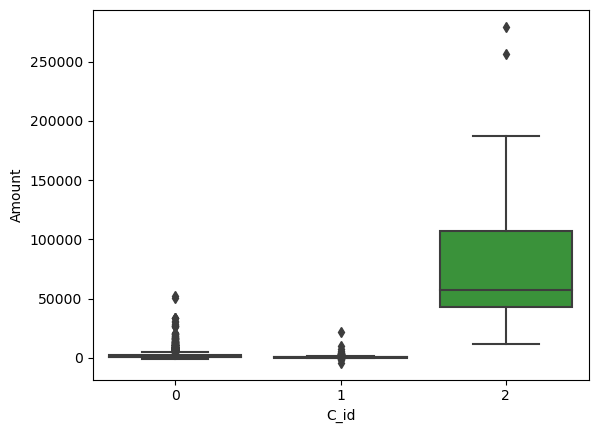

In [76]:
sns.boxplot(x='C_id',y='Amount',data=final_data)

<AxesSubplot:xlabel='C_id', ylabel='Frequency'>

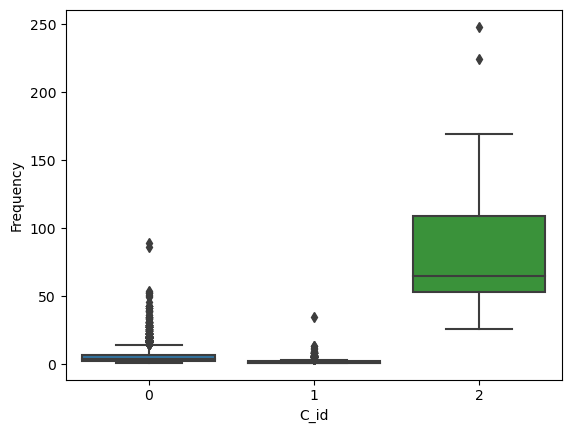

In [77]:
sns.boxplot(x='C_id',y='Frequency',data=final_data)

### * People belonging to 2 Cluster are the most valued customer for the Retail giant.

### * People belonging 1 cluster, that needs to be provided with the services or offers to increase the frequency as to impact the revenue.